In [194]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split




# Predicting the flower variety using classification

In [30]:
iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

## Data visualization and EDA (Exploratory Data Analysis)

In [31]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


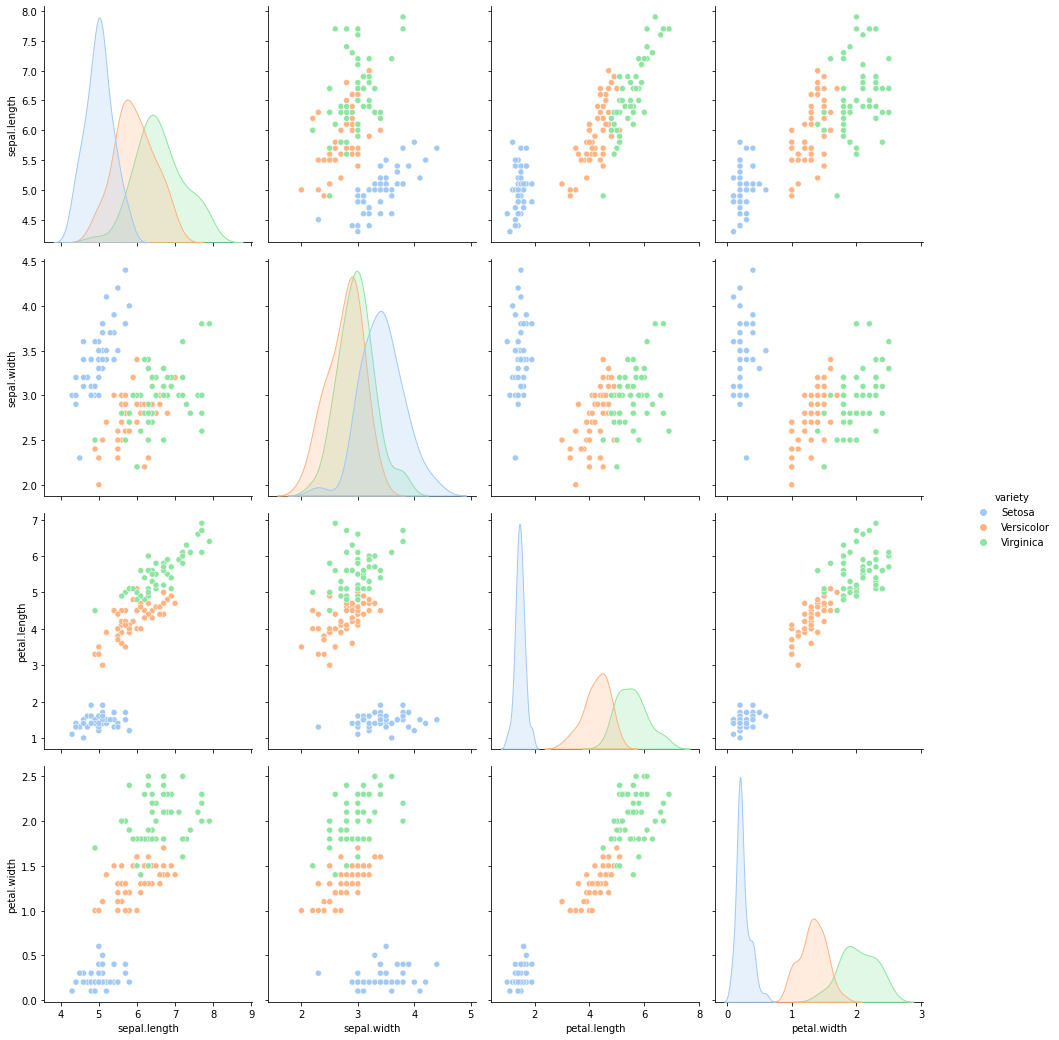

In [102]:
g=sns.pairplot(iris,hue='variety',palette = 'pastel')
g.fig.set_size_inches(15,15)

## Visual Conclusions
We can make a very well separation of the species using most of pairs of variables, except the following ones:
* Sepal's length and sepal's width

However, the specimen that can always be grouped and identified, no matter what kind of pairs of variables are used, is the Setosa variety.


In [26]:
#Transform Categorical variables to numerical variables.
iris_cat = pd.get_dummies(iris)
iris_cat

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [23]:
#Function for correlation matrix
def corr_matrix(dataframe):
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize = (10, 10))  
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(ax=ax,
                #mask=mask,
                data=corr, 
                annot=True,
                cmap="YlGnBu",
                robust=True,
               vmin=0,
               vmax=1)
    ax.set_title('Correlation Matrix', fontsize = 16)
    plt.show()

(array([ 4.,  1.,  6.,  5., 12.,  8.,  4.,  5.,  2.,  3.]),
 array([4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05, 5.2 , 5.35, 5.5 , 5.65, 5.8 ]),
 <BarContainer object of 10 artists>)

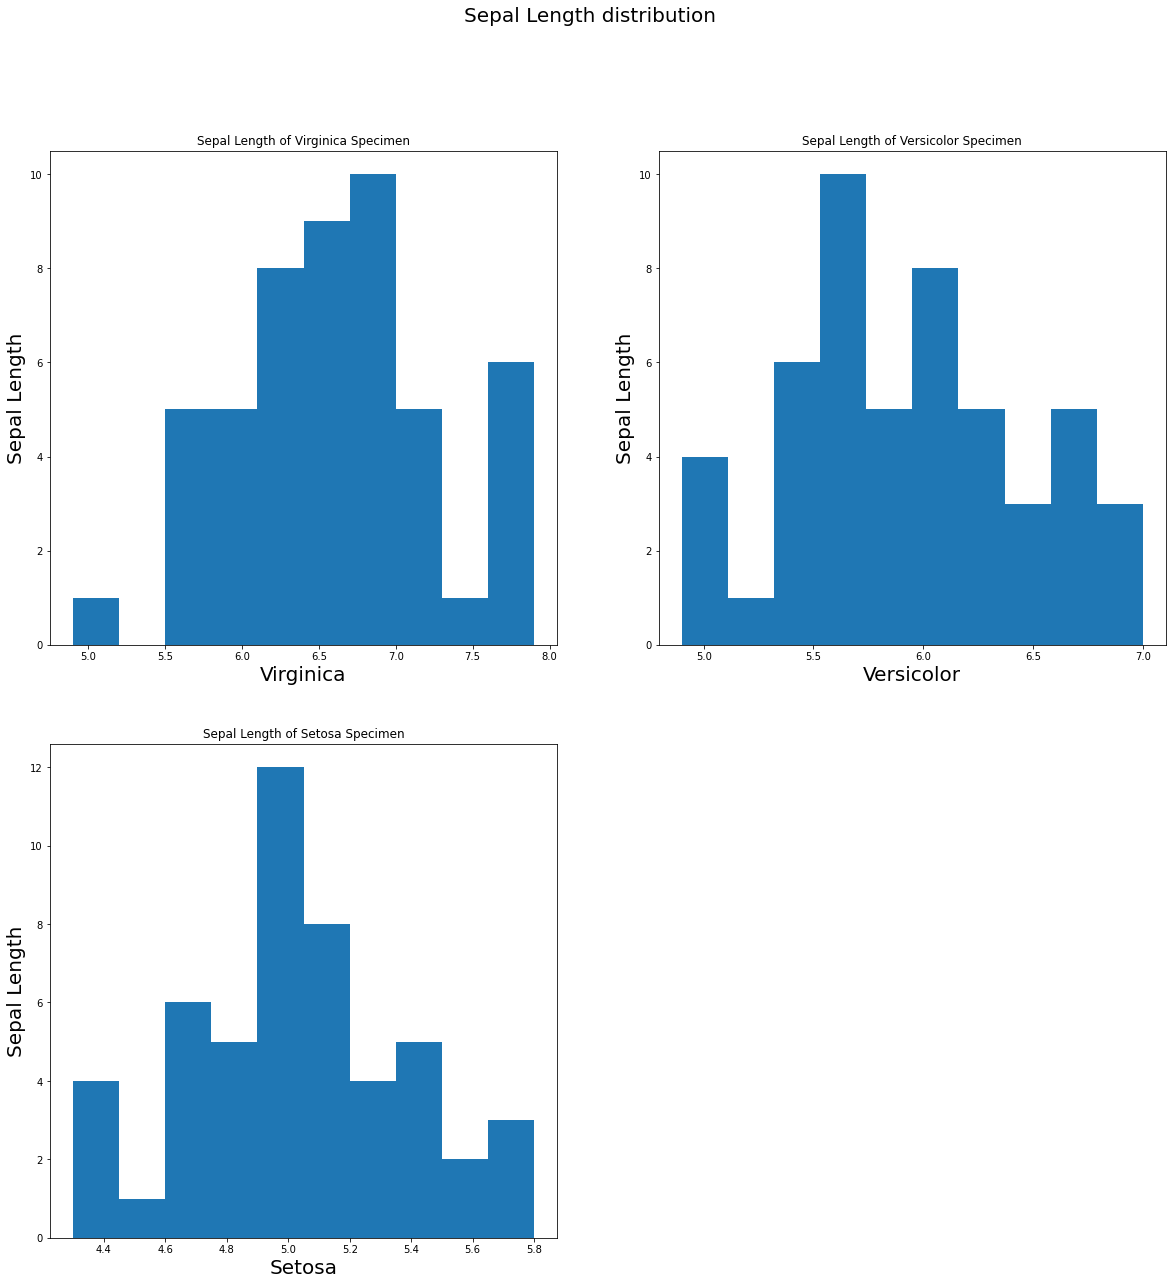

In [74]:
seplength_plot = plt.figure(figsize=(20,20))
#Posición de Gráficos
seplength_plot.suptitle("Sepal Length distribution", fontsize=20)
ax1 = seplength_plot.add_subplot(221)
ax2 = seplength_plot.add_subplot(222)
ax3 = seplength_plot.add_subplot(223)
#Titulos de Ejes
ax1.set_xlabel('Virginica', fontsize=20)
ax1.set_ylabel('Sepal Length', fontsize=20)
ax2.set_xlabel('Versicolor', fontsize=20)
ax2.set_ylabel('Sepal Length', fontsize=20)
ax3.set_xlabel('Setosa', fontsize=20)
ax3.set_ylabel('Sepal Length', fontsize=20)
#Titulos de gráficos
ax1.title.set_text('Sepal Length of Virginica Specimen')
ax2.title.set_text('Sepal Length of Versicolor Specimen')
ax3.title.set_text('Sepal Length of Setosa Specimen')
ax1.hist(iris[iris['variety']=='Virginica']['sepal.length'].values)
ax2.hist(iris[iris['variety']=='Versicolor']['sepal.length'].values)
ax3.hist(iris[iris['variety']=='Setosa']['sepal.length'].values)



(array([ 1.,  0.,  1., 10.,  7., 15.,  6.,  6.,  2.,  2.]),
 array([2.3 , 2.51, 2.72, 2.93, 3.14, 3.35, 3.56, 3.77, 3.98, 4.19, 4.4 ]),
 <BarContainer object of 10 artists>)

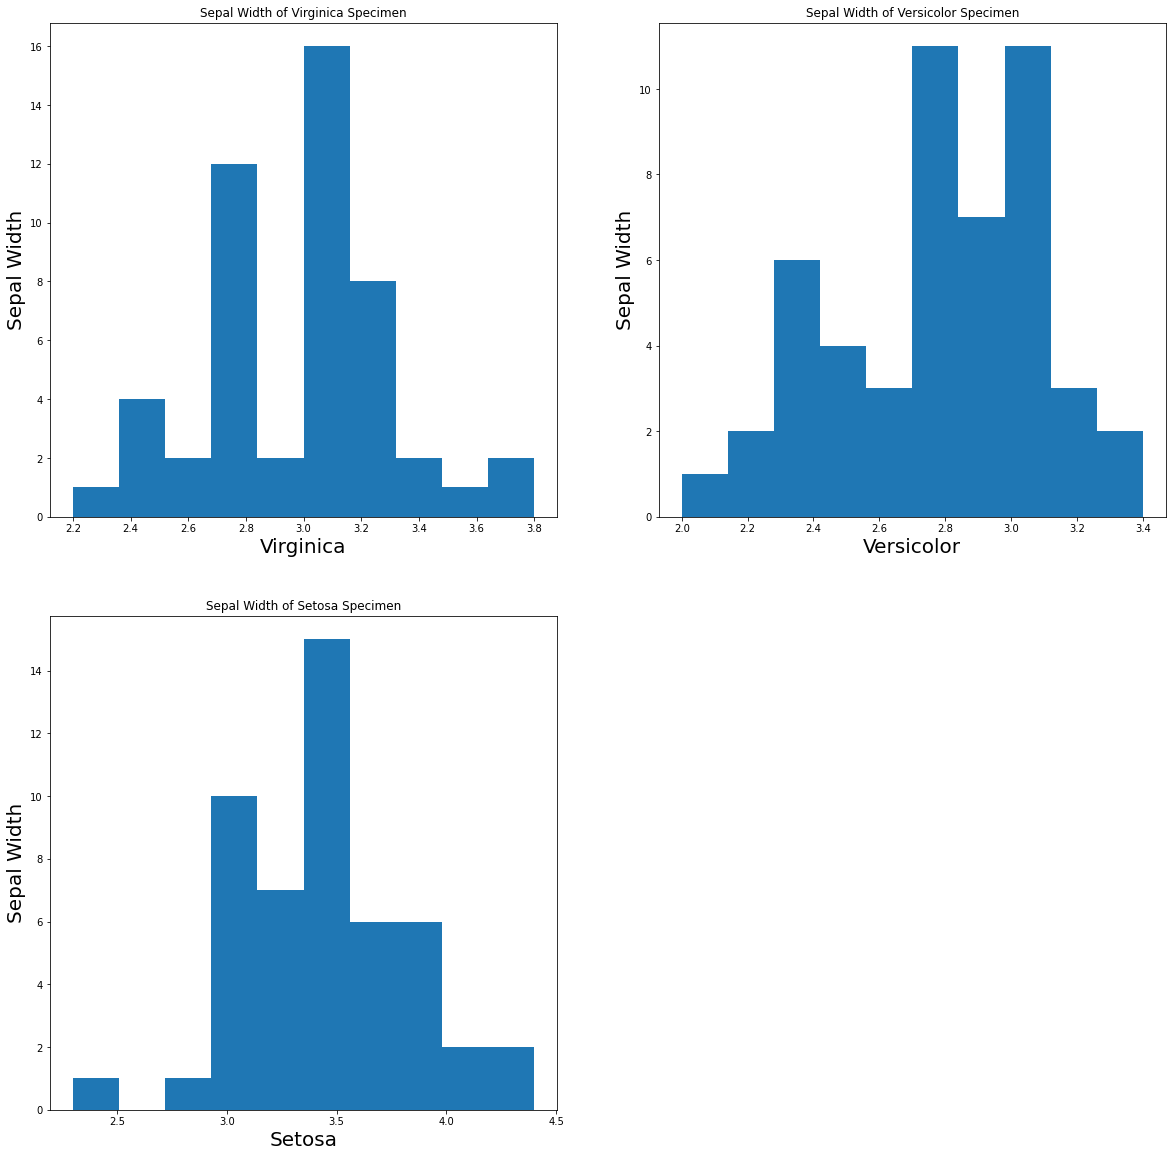

In [75]:
sepwidth_plot = plt.figure(figsize=(20,20))
#Posición de Gráficos
seplength_plot.suptitle("Sepal Width distribution", fontsize=20)
ax1 = sepwidth_plot.add_subplot(221)
ax2 = sepwidth_plot.add_subplot(222)
ax3 = sepwidth_plot.add_subplot(223)
#Titulos de Ejes
ax1.set_xlabel('Virginica', fontsize=20)
ax1.set_ylabel('Sepal Width', fontsize=20)
ax2.set_xlabel('Versicolor', fontsize=20)
ax2.set_ylabel('Sepal Width', fontsize=20)
ax3.set_xlabel('Setosa', fontsize=20)
ax3.set_ylabel('Sepal Width', fontsize=20)
#Titulos de gráficos
ax1.title.set_text('Sepal Width of Virginica Specimen')
ax2.title.set_text('Sepal Width of Versicolor Specimen')
ax3.title.set_text('Sepal Width of Setosa Specimen')
ax1.hist(iris[iris['variety']=='Virginica']['sepal.width'].values)
ax2.hist(iris[iris['variety']=='Versicolor']['sepal.width'].values)
ax3.hist(iris[iris['variety']=='Setosa']['sepal.width'].values)




(array([ 5.,  0., 29.,  7.,  0.,  0.,  7.,  0.,  1.,  1.]),
 array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ]),
 <BarContainer object of 10 artists>)

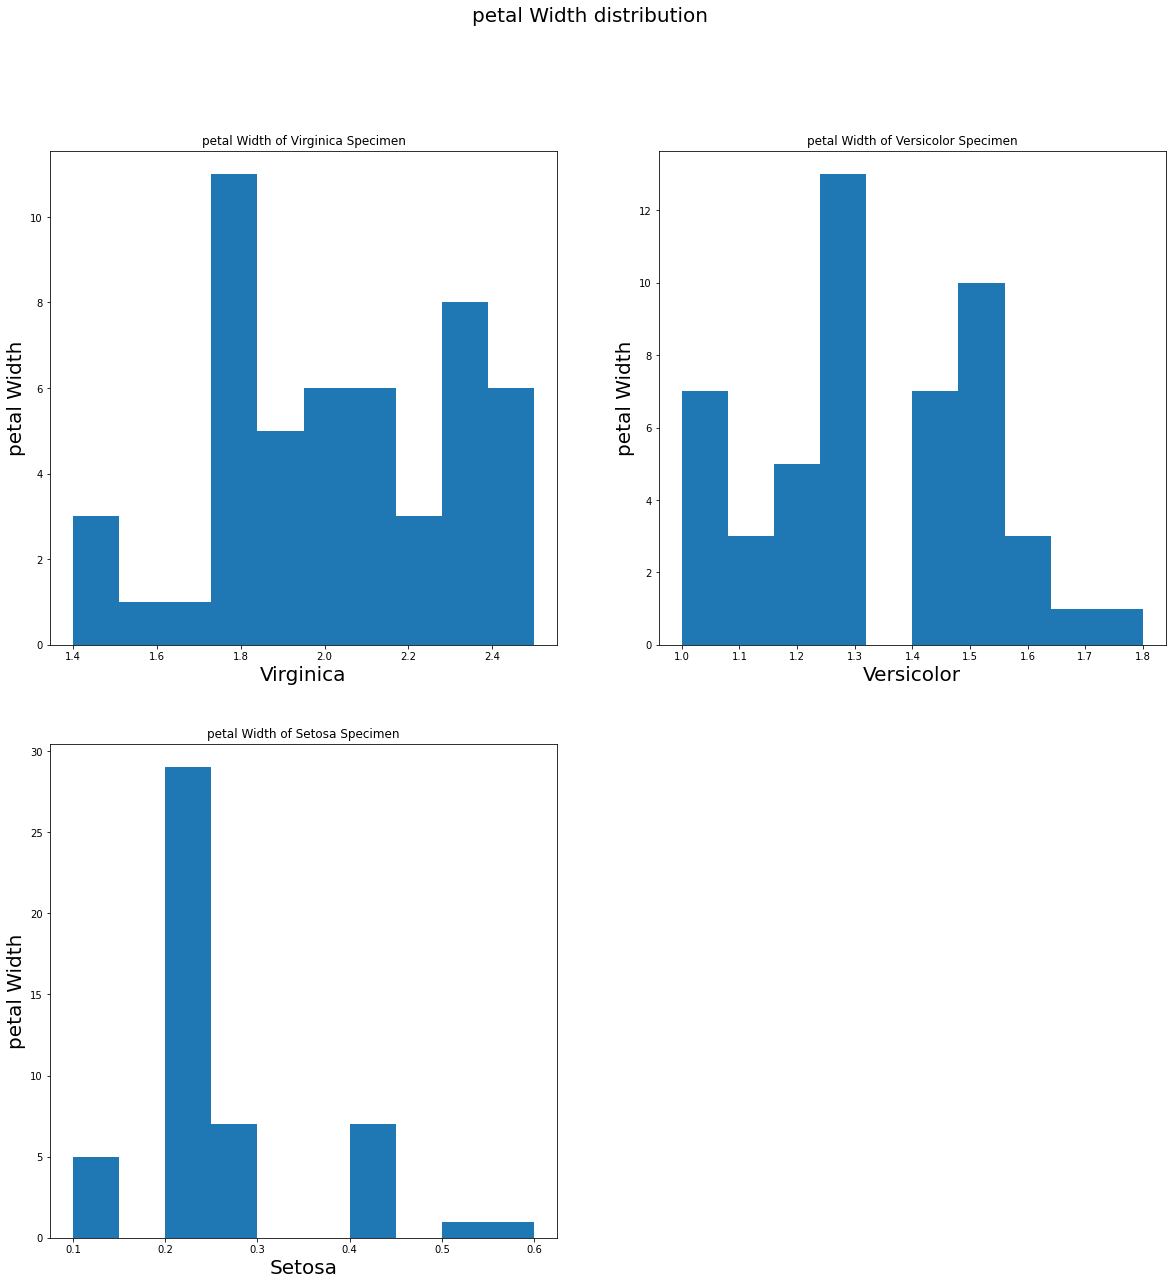

In [77]:
petwidth_plot = plt.figure(figsize=(20,20))
#Posición de Gráficos
petwidth_plot.suptitle("petal Width distribution", fontsize=20)
ax1 = petwidth_plot.add_subplot(221)
ax2 = petwidth_plot.add_subplot(222)
ax3 = petwidth_plot.add_subplot(223)
#Titulos de Ejes
ax1.set_xlabel('Virginica', fontsize=20)
ax1.set_ylabel('petal Width', fontsize=20)
ax2.set_xlabel('Versicolor', fontsize=20)
ax2.set_ylabel('petal Width', fontsize=20)
ax3.set_xlabel('Setosa', fontsize=20)
ax3.set_ylabel('petal Width', fontsize=20)
#Titulos de gráficos
ax1.title.set_text('petal Width of Virginica Specimen')
ax2.title.set_text('petal Width of Versicolor Specimen')
ax3.title.set_text('petal Width of Setosa Specimen')
ax1.hist(iris[iris['variety']=='Virginica']['petal.width'].values)
ax2.hist(iris[iris['variety']=='Versicolor']['petal.width'].values)
ax3.hist(iris[iris['variety']=='Setosa']['petal.width'].values)




(array([ 1.,  1.,  2.,  7., 13., 13.,  7.,  4.,  0.,  2.]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]),
 <BarContainer object of 10 artists>)

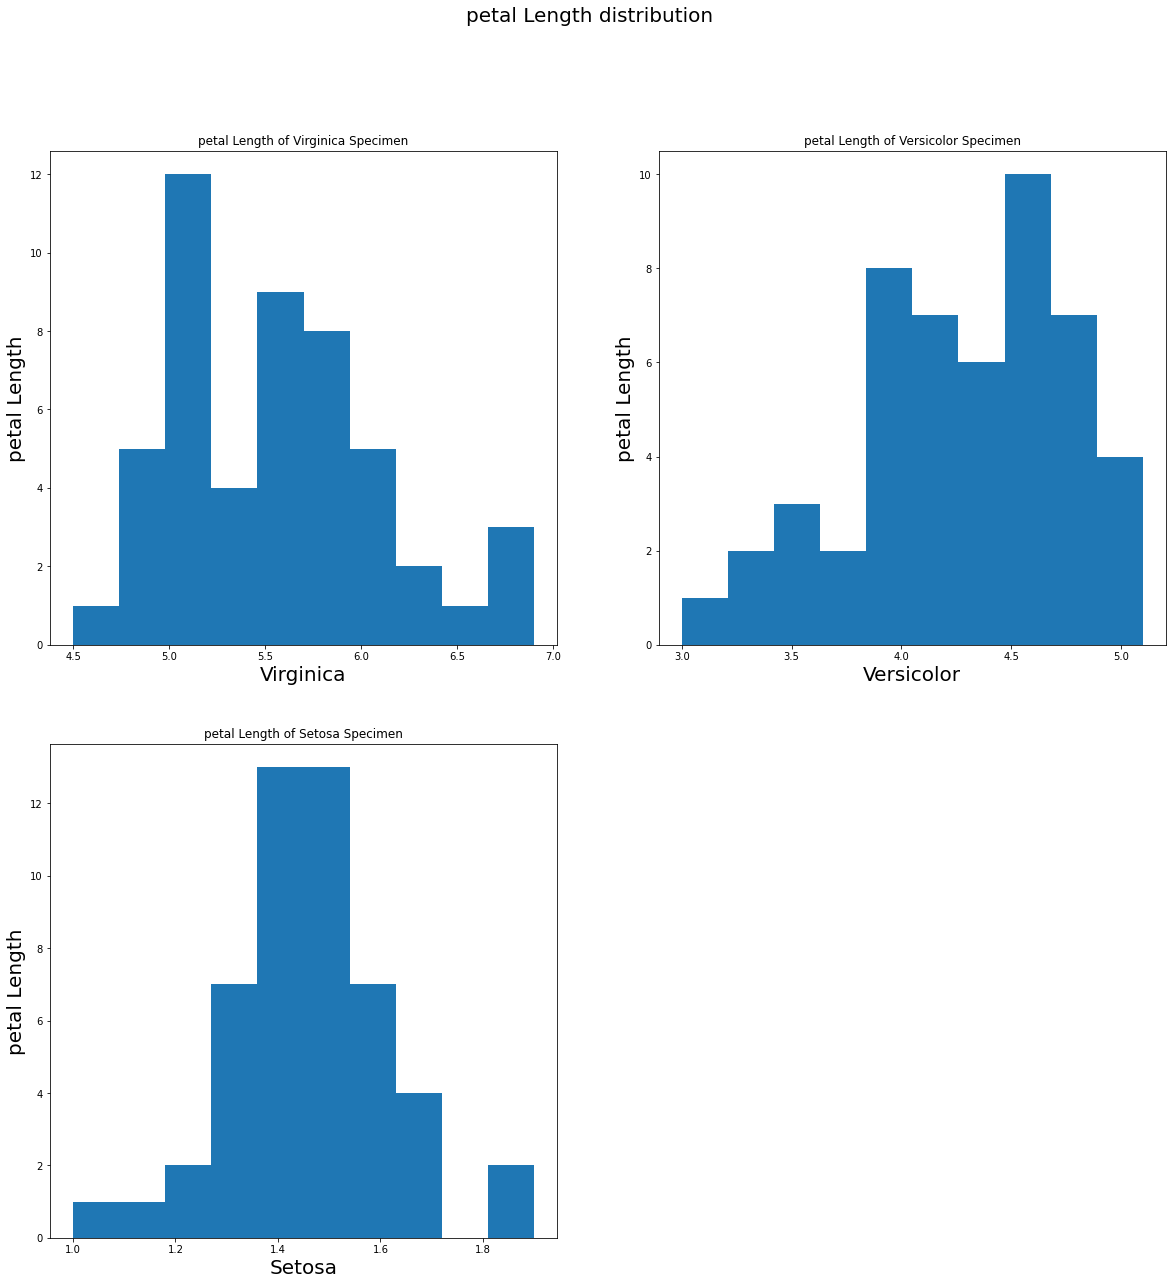

In [78]:
petlength_plot = plt.figure(figsize=(20,20))
#Posición de Gráficos
petlength_plot.suptitle("petal Length distribution", fontsize=20)
ax1 = petlength_plot.add_subplot(221)
ax2 = petlength_plot.add_subplot(222)
ax3 = petlength_plot.add_subplot(223)
#Titulos de Ejes
ax1.set_xlabel('Virginica', fontsize=20)
ax1.set_ylabel('petal Length', fontsize=20)
ax2.set_xlabel('Versicolor', fontsize=20)
ax2.set_ylabel('petal Length', fontsize=20)
ax3.set_xlabel('Setosa', fontsize=20)
ax3.set_ylabel('petal Length', fontsize=20)
#Titulos de gráficos
ax1.title.set_text('petal Length of Virginica Specimen')
ax2.title.set_text('petal Length of Versicolor Specimen')
ax3.title.set_text('petal Length of Setosa Specimen')
ax1.hist(iris[iris['variety']=='Virginica']['petal.length'].values)
ax2.hist(iris[iris['variety']=='Versicolor']['petal.length'].values)
ax3.hist(iris[iris['variety']=='Setosa']['petal.length'].values)


In [86]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


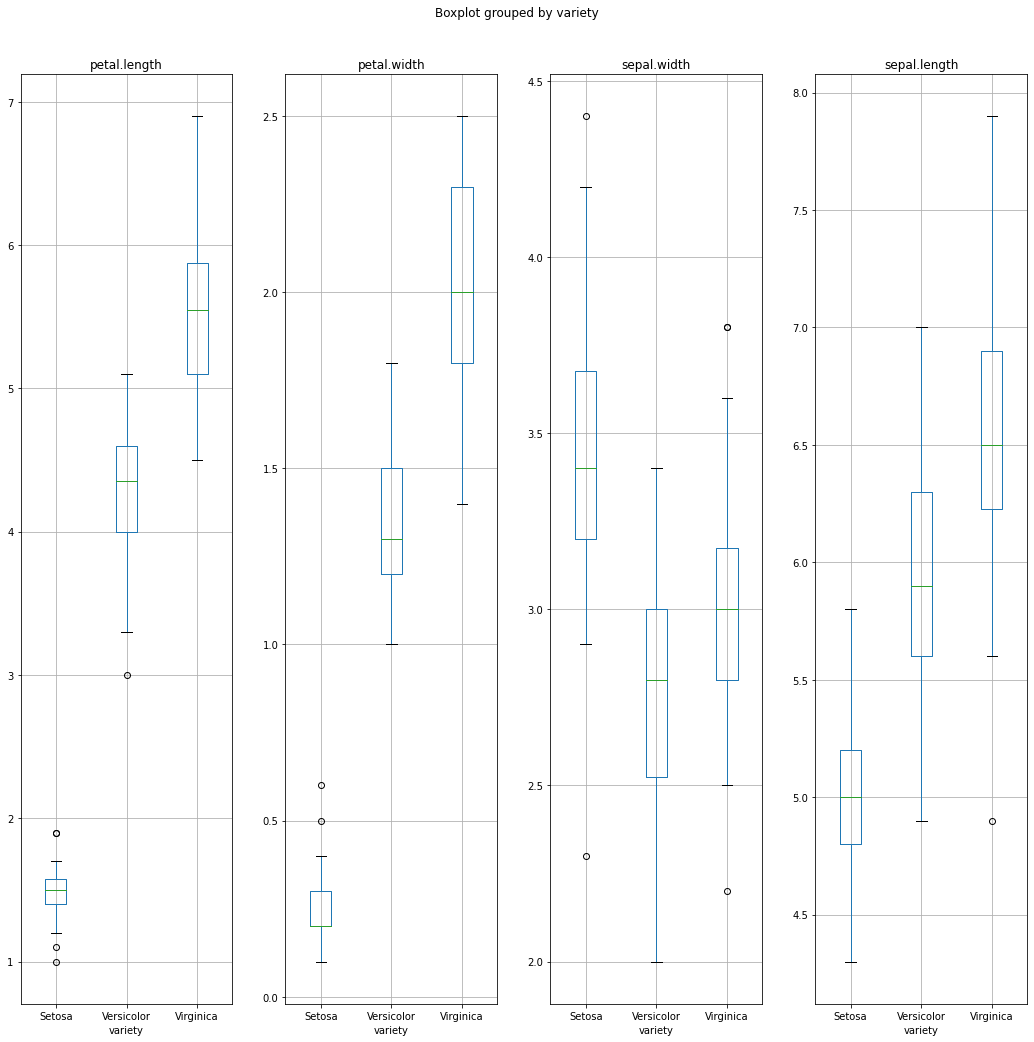

In [99]:
fig, ax = plt.subplots(1, 4, figsize=(15, 15))
iris.boxplot('petal.length','variety', ax=ax[0])
iris.boxplot('petal.width','variety', ax=ax[1])
iris.boxplot('sepal.width','variety', ax=ax[2])
iris.boxplot('sepal.length','variety', ax=ax[3])
fig.tight_layout(pad=3.0);



<AxesSubplot:>

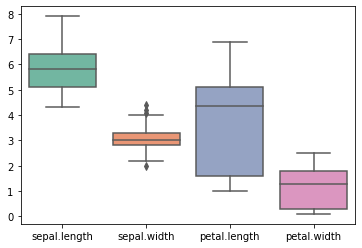

In [91]:
sns.boxplot(data=iris, orient="v", palette="Set2")

In [103]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [137]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris, test_size = 0.3, stratify = iris['variety'])

In [138]:
Error= []
X_train = train[['sepal.length','sepal.width','petal.length','petal.width']]
y_train = train.variety
X_test = test[['sepal.length','sepal.width','petal.length','petal.width']]
y_test = test.variety
classes = ['setosa', 'versicolor', 'virginica']


In [143]:
X_train.columns.tolist()

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

## Using Decision Tree Classifier

In [139]:
DTree_Classifier = DecisionTreeClassifier(max_depth = 3, random_state = 1)
DTree_Classifier.fit(X_train,y_train)
prediction=DTree_Classifier.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.5f}".format(metrics.accuracy_score(prediction,y_test)))
print('The F1-Score of the Decision Tree is',"{:.5f}".format(metrics.f1_score(y_test,prediction,average='weighted')))


The accuracy of the Decision Tree is 0.95556
The F1-Score of the Decision Tree is 0.95536


In [140]:
Error.append(['Decision Tree',metrics.f1_score(y_test,prediction,average='weighted'),metrics.accuracy_score(prediction,y_test)])

Let's check which variables are the most important according to Decision Tree Classifier

In [177]:
Dtree_Weights = dict(zip(X_train.columns.tolist(),DTree_Classifier.feature_importances_))
Dtree_Weights = pd.DataFrame.from_dict(Dtree_Weights,orient='index')
Dtree_Weights.columns = ['Weights']
Var_Weights

,Weights
sepal.length,0.00000
sepal.width,0.00000
petal.length,0.42853
petal.width,0.57147


[Text(209.25, 380.52, 'petal.width <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(279.0, 271.8, 'petal.length <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(139.5, 163.07999999999998, 'petal.width <= 1.65\ngini = 0.061\nsamples = 32\nvalue = [0, 31, 1]\nclass = versicolor'),
 Text(69.75, 54.360000000000014, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = versicolor'),
 Text(209.25, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(418.5, 163.07999999999998, 'petal.length <= 4.95\ngini = 0.188\nsamples = 38\nvalue = [0, 4, 34]\nclass = virginica'),
 Text(348.75, 54.360000000000014, 'gini = 0.49\nsamples = 7\nvalue = [0, 3, 4]\nclass = virginica'),
 Text(488.25, 54.360000000000014, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]\nclass = virginica')]

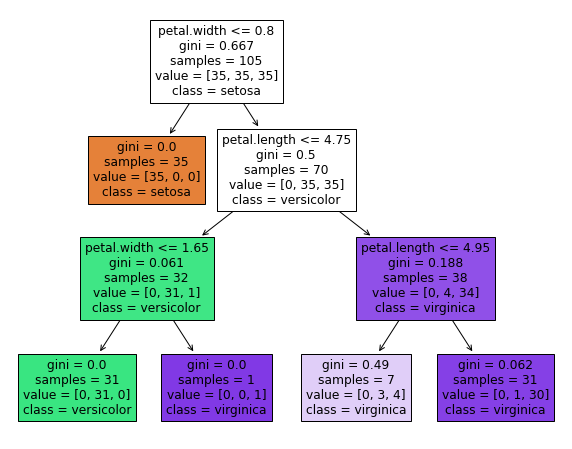

In [188]:
plt.figure(figsize = (10,8))
plot_tree(DTree_Classifier, feature_names = X_train.columns.tolist(), class_names = classes, filled = True)

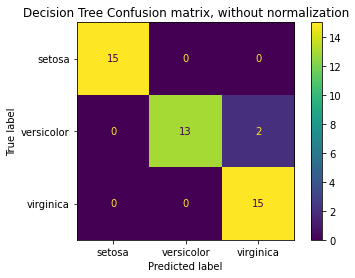

In [193]:
disp = metrics.plot_confusion_matrix(DTree_Classifier, X_test, y_test,
                                 display_labels=cn,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');


This model fits pretty well with an accuracy of 96%. Furthermore, it can be seen that the model works perfectly for the setosa variety, this result confirms the statement that the setosa could be differentiated easily among the other variables. It must be highlighted that the sepal's width and the sepal's length were the variables that had no influence in the model, that can be explained observing the distributions of these characteristics differentiating the varietys, where they have  similar distributions.